In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [523]:
# 从文件导入数据
datafile = r'C:\Users\30272\Desktop\Machine_Learning\My_Notes\Linear regression models\Code_Jupyter\data\housing.data'
housing_data = np.fromfile(datafile, sep=' ') # 从文件中导入数据
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_names1 = ['犯罪率', '住宅用地比例', '非零售商业用地比例', '是否靠近查尔斯河', '一氧化氮浓度', '房间数', '房龄', '五个中心区域的加权距离', '辐射指数', '税率', '城镇师生比', '黑人比例', '低收入人口比例', '房价中位数']
feature_num = len(feature_names)
# 将原始数据进行Reshape，变成[N, 14]这样的形状
housing_data = housing_data.reshape([housing_data.shape[0] // feature_num, feature_num])

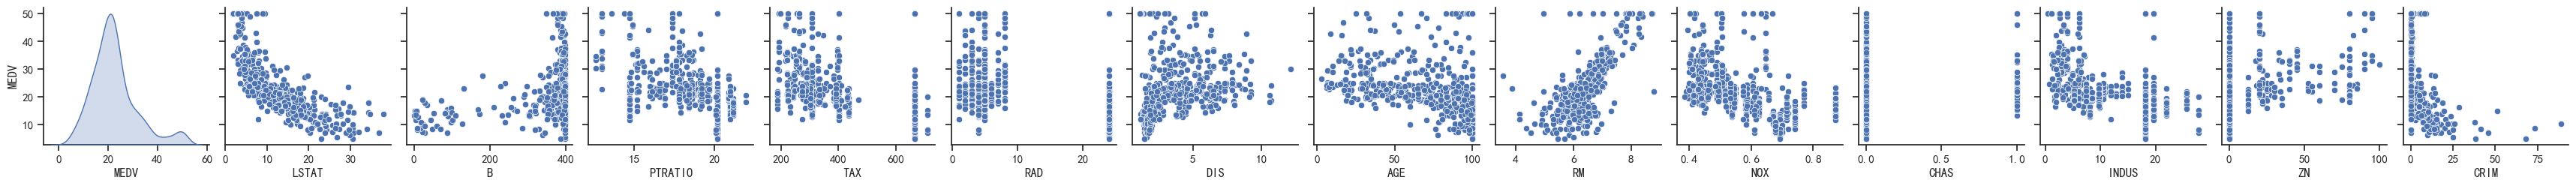

In [524]:
# 画图看特征间的关系,主要是变量两两之间的关系（线性或非线性，有无明显较为相关关系）
features_np = np.array([x[:13] for x in housing_data], np.float32) # 特征数据
labels_np = np.array([x[-1] for x in housing_data], np.float32)
# data_np = np.c_[features_np, labels_np]
df = pd.DataFrame(housing_data, columns=feature_names)
df2 = pd.DataFrame(housing_data, columns=feature_names1)
matplotlib.use('TkAgg') # 使用TkAgg后端来显示图形
%matplotlib inline
sns.pairplot(df.dropna(), y_vars=feature_names[-1], x_vars=feature_names[::-1], diag_kind='kde')
plt.show()


In [525]:
df2.head() # 查看数据的前5行

,犯罪率,住宅用地比例,非零售商业用地比例,是否靠近查尔斯河,一氧化氮浓度,房间数,房龄,五个中心区域的加权距离,辐射指数,税率,城镇师生比,黑人比例,低收入人口比例,房价中位数
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [526]:
features_np.shape # 查看特征数据的形状

(506, 13)

In [527]:
features_np[0:5] # 查看前5行特征数据

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]], dtype=float32)

In [528]:
labels_np.shape # 查看标签数据的形状

(506,)

In [529]:
labels_np[0:5] # 查看标签数据的前5行

array([24. , 21.6, 34.7, 33.4, 36.2], dtype=float32)

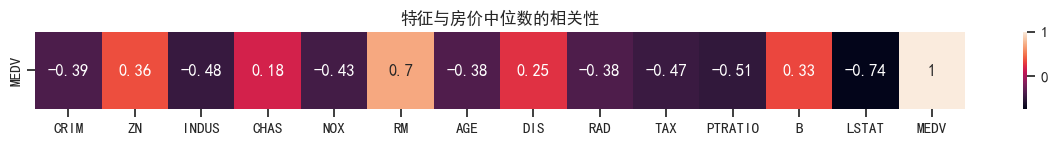

In [530]:
# 画出特征与房价中位数的相关性热力图
fig, ax = plt.subplots(figsize=(15, 1))  # 设置画布大小
corr_data = df.corr().iloc[-1] # 取出最后一行（MEDV与其他特征的相关性）
corr_data = np.asarray(corr_data).reshape(1, 14) # 将数据转换为二维数组
ax = sns.heatmap(corr_data, cbar=True, annot=True) # 画出热力图
ax.set_xticklabels(feature_names, rotation=0) # 设置x轴标签的旋转角度
ax.set_yticklabels(['MEDV']) # 设置y轴标签
plt.title('特征与房价中位数的相关性') # 设置标题
plt.show()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 显示负号

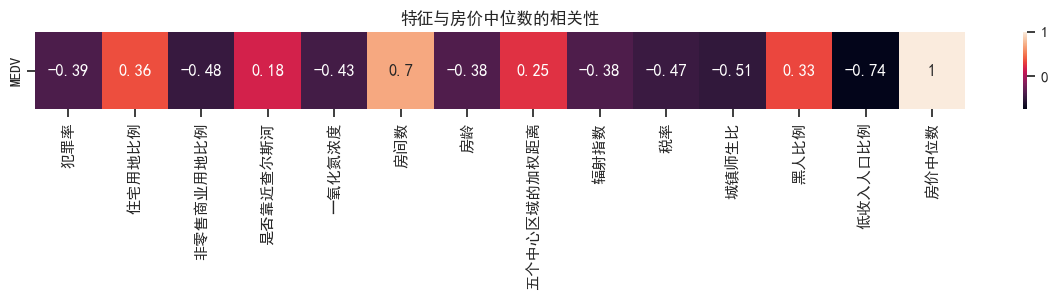

In [531]:
# 画出特征与房价中位数的相关性热力图
fig, ax = plt.subplots(figsize=(15, 1))  # 设置画布大小
corr_data = df.corr().iloc[-1] # 取出最后一行（MEDV与其他特征的相关性）
corr_data = np.asarray(corr_data).reshape(1, 14) # 将数据转换为二维数组
ax = sns.heatmap(corr_data, cbar=True, annot=True) # 画出热力图
ax.set_xticklabels(feature_names1, rotation=90) # 设置x轴标签的旋转角度
ax.set_yticklabels(['MEDV']) # 设置y轴标签
plt.title('特征与房价中位数的相关性') # 设置标题
plt.show()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 显示负号

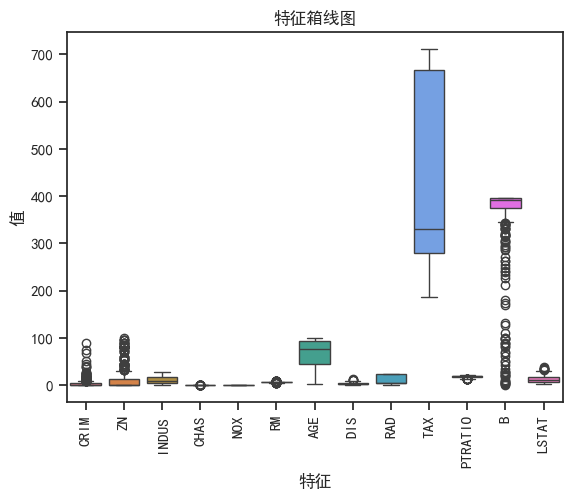

In [532]:
sns.boxplot(data=df.iloc[:, 0:13]) # 画出箱线图
plt.title('特征箱线图') # 设置标题
plt.xlabel('特征')
plt.ylabel('值') # 设置x轴和y轴标签
plt.xticks(rotation=90) # 设置x轴标签的旋转角度
plt.show() # 显示图形
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体为黑体

In [533]:
features_max = housing_data.max(axis=0)
features_min = housing_data.min(axis=0)
features_avg = housing_data.sum(axis=0) / housing_data.shape[0]


In [534]:
BATCH_SIZE = 2 # 批量大小
def feature_norm(input): # x轴标签
    f_size = input.shape # 获取样本数和特征数
    output_features = np.zeros(f_size, np.float32) # 设置标题
    for batch_id in range(f_size[0]): # 遍历每一个样本
        for index in range(13): # 遍历每一个特征
            output_features[batch_id][index] = (input[batch_id][index] - features_avg[index]) / (features_max[index] - features_min[index])
    return output_features 


In [535]:
# 只对属性进行归一化
housing_features = feature_norm(housing_data[:, :13])
# print(feature_trian.shape)
housing_data = np.c_[housing_features, housing_data[:, -1]].astype(np.float32)
# print(training_data[0])


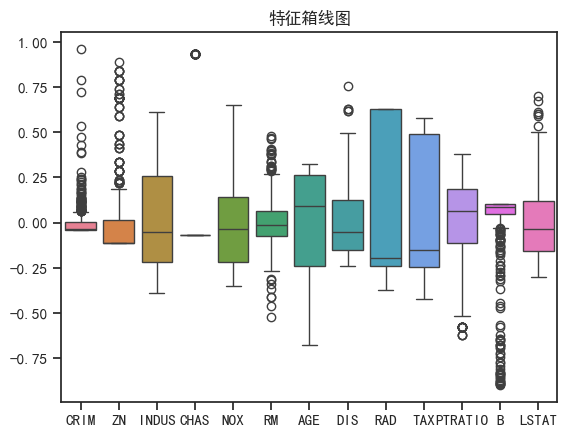

In [536]:
# 归一化后的train_data, 看下各属性的情况
features_np = np.array([x[:13] for x in housing_data],np.float32) # 特征数据
labels_np = np.array([x[-1] for x in housing_data],np.float32) # 标签数据
data_np = np.c_[features_np, labels_np] # 合并数据
df = pd.DataFrame(data_np, columns=feature_names) # 创建DataFrame对象
sns.boxplot(data=df.iloc[:, 0:13]) # 画出箱线图
plt.title('特征箱线图') # 设置标题
plt.show()


In [537]:
df.head() # 查看数据的前5行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,24.000000
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,21.600000
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,34.700001
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,33.400002
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,36.200001


In [538]:
# 将训练数据集和测试数据集按照8:2的比例分开
ratio = 0.8
offset = int(housing_data.shape[0] * ratio)
train_data = housing_data[:offset] # 训练数据集
test_data = housing_data[offset:] # 测试数据集


In [539]:
train_data.shape # 查看训练数据集的形状

(404, 14)

In [540]:
test_data.shape # 查看测试数据集的形状

(102, 14)

In [541]:
X_train = train_data[:, :-1] # 训练数据集的特征数据
y_train = train_data[:, -1] # 训练数据集的标签数据
X_test = test_data[:, :-1] # 测试数据集的特征数据
y_test = test_data[:, -1] # 测试数据集的标签数据


In [542]:
print(X_train.shape) # 查看训练数据集的特征数据的形状
print(y_train.shape) # 查看训练数据集的标签数据的形状
print(X_test.shape) # 查看测试数据集的特征数据的形状
print(y_test.shape) # 查看测试数据集的标签数据的形状

(404, 13)
(404,)
(102, 13)
(102,)


In [543]:
# -------------------- 多元线性回归的梯度下降实现 --------------------
learning_rate = 0.01 # 学习率
n_iterations = 10000# 迭代次数
n_features = 12 # 特征数量
theta_gd = np.random.randn(n_features + 1, 1)  # 初始化参数
#theta_gd = np.ones((n_features + 1, 1))  # 初始化参数
n_samples = X_train.shape[0] # 样本数量
cast =[] # 用于存储每次迭代的损失函数值
# 梯度下降算法
for iteration in range(n_iterations):
    # 计算预测值
    y_pred = X_train.dot(theta_gd) # 预测值
    # 计算损失函数（均方误差）
    loss = (1/(2*n_samples)) * np.sum((y_pred - y_train.reshape(-1, 1))**2)
    cast.append(loss) # 存储损失函数值
    # 每100次迭代打印一次损失函数值
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Loss = {loss}")
    # 计算梯度
    gradients = (1/n_samples) * X_train.T.dot(X_train.dot(theta_gd) - y_train.reshape(-1, 1))
    theta_gd = theta_gd - learning_rate * gradients

Iteration 0: Loss = 337.96238482300953
Iteration 100: Loss = 297.3245931250883
Iteration 200: Loss = 274.09156140932276
Iteration 300: Loss = 260.03869966987537
Iteration 400: Loss = 250.93229356281302
Iteration 500: Loss = 244.5760070682832
Iteration 600: Loss = 239.8164713625905
Iteration 700: Loss = 236.03660048289072
Iteration 800: Loss = 232.89701528256487
Iteration 900: Loss = 230.203749899334
Iteration 1000: Loss = 227.84029082954729
Iteration 1100: Loss = 225.73243655259714
Iteration 1200: Loss = 223.82994037601935
Iteration 1300: Loss = 222.09676796965468
Iteration 1400: Loss = 220.50580343675804
Iteration 1500: Loss = 219.03587448769127
Iteration 1600: Loss = 217.6700045073749
Iteration 1700: Loss = 216.39432818044193
Iteration 1800: Loss = 215.1973775453123
Iteration 1900: Loss = 214.0695838462521
Iteration 2000: Loss = 213.00291190884056
Iteration 2100: Loss = 211.99058083056616
Iteration 2200: Loss = 211.02684427979113
Iteration 2300: Loss = 210.10681415723684
Iteration 24

In [544]:
print("\n多元线性回归梯度下降结果:")
for i in range(len(theta_gd)):
    print(f"{feature_names1[i]} (特征{i+1}系数): {theta_gd[i][0]:.4f}")
print("\n多元线性回归梯度下降结果:")
for i in range(len(theta_gd)):
    print(f"{feature_names[i]} (特征{i+1}系数): {theta_gd[i][0]:.4f}")


多元线性回归梯度下降结果:
犯罪率 (特征1系数): -4.9561
住宅用地比例 (特征2系数): 5.4598
非零售商业用地比例 (特征3系数): -5.0929
是否靠近查尔斯河 (特征4系数): 9.0235
一氧化氮浓度 (特征5系数): 8.1563
房间数 (特征6系数): 7.4715
房龄 (特征7系数): 5.1375
五个中心区域的加权距离 (特征8系数): -10.5458
辐射指数 (特征9系数): -13.1376
税率 (特征10系数): -15.6541
城镇师生比 (特征11系数): -12.5134
黑人比例 (特征12系数): 64.8405
低收入人口比例 (特征13系数): -25.6720

多元线性回归梯度下降结果:
CRIM (特征1系数): -4.9561
ZN (特征2系数): 5.4598
INDUS (特征3系数): -5.0929
CHAS (特征4系数): 9.0235
NOX (特征5系数): 8.1563
RM (特征6系数): 7.4715
AGE (特征7系数): 5.1375
DIS (特征8系数): -10.5458
RAD (特征9系数): -13.1376
TAX (特征10系数): -15.6541
PTRATIO (特征11系数): -12.5134
B (特征12系数): 64.8405
LSTAT (特征13系数): -25.6720


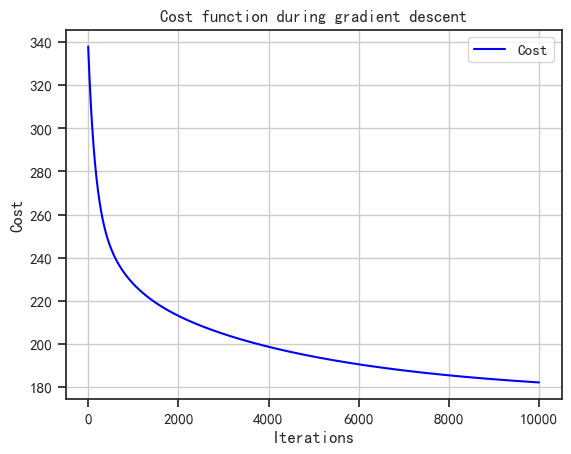

In [545]:
plt.plot(range(n_iterations), cast, color='blue',label='Cost') # 绘制损失函数曲线
plt.xlabel('Iterations') # 设置x轴标签
plt.ylabel('Cost') # 设置y轴标签
plt.title('Cost function during gradient descent') # 设置标题
plt.legend() # 添加图例
plt.grid() # 添加网格
plt.show() # 显示损失函数曲线图

均方误差： 3191.688030628969


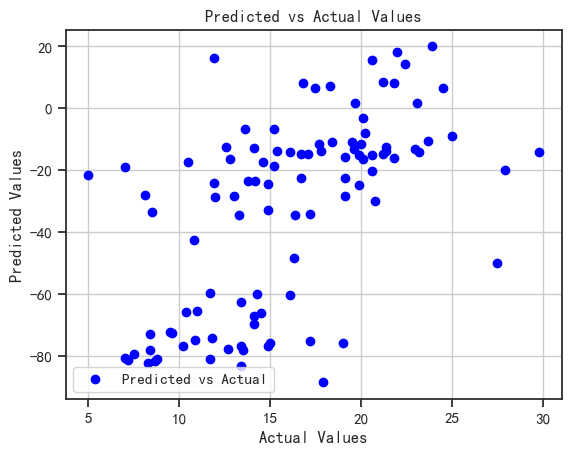

In [546]:
# 计算均方误差（MSE）
X_test = test_data[:, :-1] # 测试数据集的特征数据
y_test = test_data[:, -1] # 测试数据集的标签数据
y_pred = X_test.dot(theta_gd) # 预测值
mse = np.mean((y_pred - y_test.reshape(-1, 1))**2) # 均方误差
print('均方误差：', mse) # 打印均方误差
# 画出预测值与真实值的对比图
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual') # 绘制散点图
plt.xlabel('Actual Values') # x轴标签
plt.ylabel('Predicted Values') # y轴标签
plt.title('Predicted vs Actual Values') # 图标题
plt.legend() # 显示图例
plt.grid() # 显示网格
plt.show() # 显示图形

准确率： 3.789244585258189


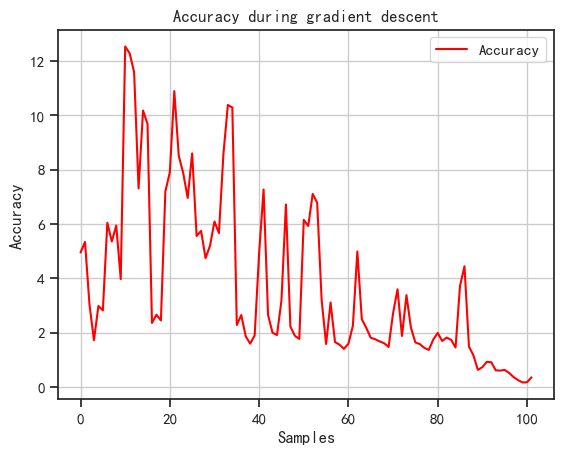

In [547]:
X_test = test_data[:, :-1] # 测试数据集的特征数据
y_test = test_data[:, -1] # 测试数据集的标签数据
y_pred = X_test.dot(theta_gd) # 预测值
accuracies = [] # 用于存储准确率
for i in range(len(y_pred)):
    accuracy = abs((y_pred[i][0] - y_test[i]) / y_test[i]) # 计算准确率
    accuracies.append(accuracy) # 存储准确率
print('准确率：', np.mean(accuracies)) # 打印准确率
plt.plot(range(len(accuracies)), accuracies, color='red',label='Accuracy') # 绘制准确率曲线
plt.xlabel('Samples') # x轴标签
plt.ylabel('Accuracy') # y轴标签
plt.title('Accuracy during gradient descent') # 图标题
plt.legend() # 显示图例
plt.grid() # 显示网格
plt.show() # 显示图形

In [548]:
X_train = train_data[:, :-1] # 训练数据集的特征数据
y_train = train_data[:, -1] # 训练数据集的标签数据
X_test = test_data[:, :-1] # 测试数据集的特征数据
y_test = test_data[:, -1] # 测试数据集的标签数据

In [549]:
#-------------------- 多元线性回归的正规方程实现 --------------------
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train.reshape(-1, 1))

In [550]:
print("\n多元线性回归正规方程结果:")
for i in range(len(theta_best)):
    print(f"{feature_names1[i]} (特征{i+1}系数): {theta_best[i][0]:.4f}")
print("\n多元线性回归正规方程结果:")
for i in range(len(theta_best)):
    print(f"{feature_names[i]} (特征{i+1}系数): {theta_best[i][0]:.4f}")


多元线性回归正规方程结果:
犯罪率 (特征1系数): -5.5006
住宅用地比例 (特征2系数): 8.0431
非零售商业用地比例 (特征3系数): -4.9171
是否靠近查尔斯河 (特征4系数): 8.2297
一氧化氮浓度 (特征5系数): 19.6367
房间数 (特征6系数): -4.5396
房龄 (特征7系数): 5.2432
五个中心区域的加权距离 (特征8系数): -10.7169
辐射指数 (特征9系数): -14.3319
税率 (特征10系数): -14.8758
城镇师生比 (特征11系数): -11.5712
黑人比例 (特征12系数): 96.2658
低收入人口比例 (特征13系数): -36.0660

多元线性回归正规方程结果:
CRIM (特征1系数): -5.5006
ZN (特征2系数): 8.0431
INDUS (特征3系数): -4.9171
CHAS (特征4系数): 8.2297
NOX (特征5系数): 19.6367
RM (特征6系数): -4.5396
AGE (特征7系数): 5.2432
DIS (特征8系数): -10.7169
RAD (特征9系数): -14.3319
TAX (特征10系数): -14.8758
PTRATIO (特征11系数): -11.5712
B (特征12系数): 96.2658
LSTAT (特征13系数): -36.0660


准确率： 4.4236712


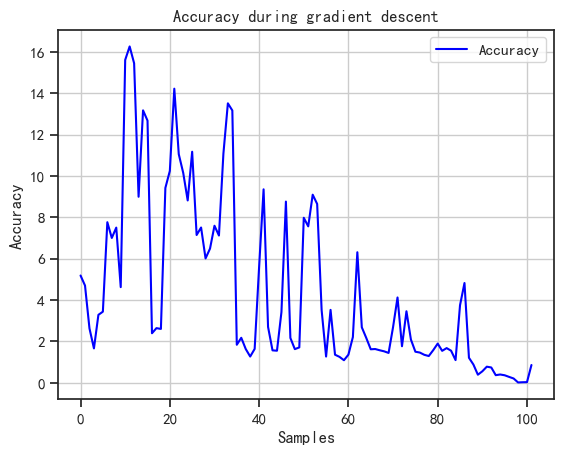

In [553]:
X_test = test_data[:, :-1] # 测试数据集的特征数据
y_test = test_data[:, -1] # 测试数据集的标签数据
y_pred = X_test.dot(theta_best) # 预测值
accuracies = [] # 用于存储准确率
for i in range(len(y_pred)):
    accuracy = abs((y_pred[i][0] - y_test[i]) / y_test[i]) # 计算准确率
    accuracies.append(accuracy) # 存储准确率
print('准确率：', np.mean(accuracies)) # 打印准确率
plt.plot(range(len(accuracies)), accuracies, color='blue',label='Accuracy') # 绘制准确率曲线
plt.xlabel('Samples') # x轴标签
plt.ylabel('Accuracy') # y轴标签
plt.title('Accuracy during gradient descent') # 图标题
plt.legend() # 显示图例
plt.grid() # 显示网格
plt.show() # 显示图形

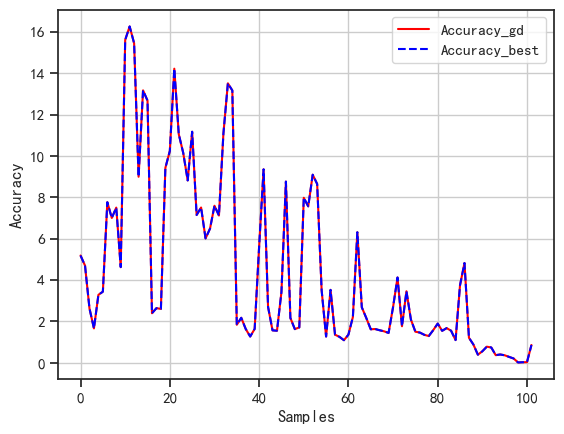

In [555]:
plt.plot(range(len(accuracies)), accuracies, color='red',label='Accuracy_gd') # 绘制准确率曲线
plt.plot(range(len(accuracies)), accuracies,'--' ,color='blue',label='Accuracy_best') # 绘制准确率曲线
plt.xlabel('Samples') # x轴标签
plt.ylabel('Accuracy') # y轴标签
plt.legend()
plt.grid() # 显示网格
plt.show() # 显示图形